# Logistic Regression Project Exercise 

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

heart_disease = fetch_ucirepo(id=45) 
  
X = heart_disease.data.features 
y = heart_disease.data.targets 
df = pd.merge(heart_disease.data.features, heart_disease.data.targets, right_index=True, left_index=True)
df.head()
df.dropna(inplace=True)

### Import Libraries

### Exploratory Data Analysis and Visualization
---
- Perform EDA and explain each graph

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

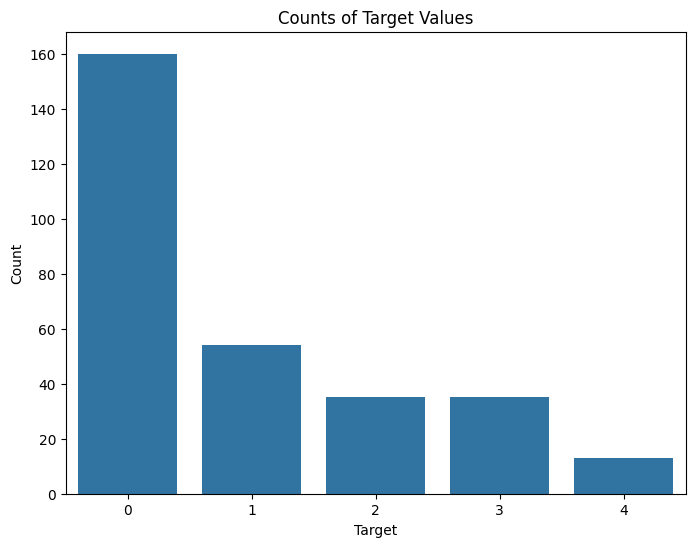

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='num')
plt.title('Counts of Target Values')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**TASK: Create a pairplot that displays the relationships between the following columns:**

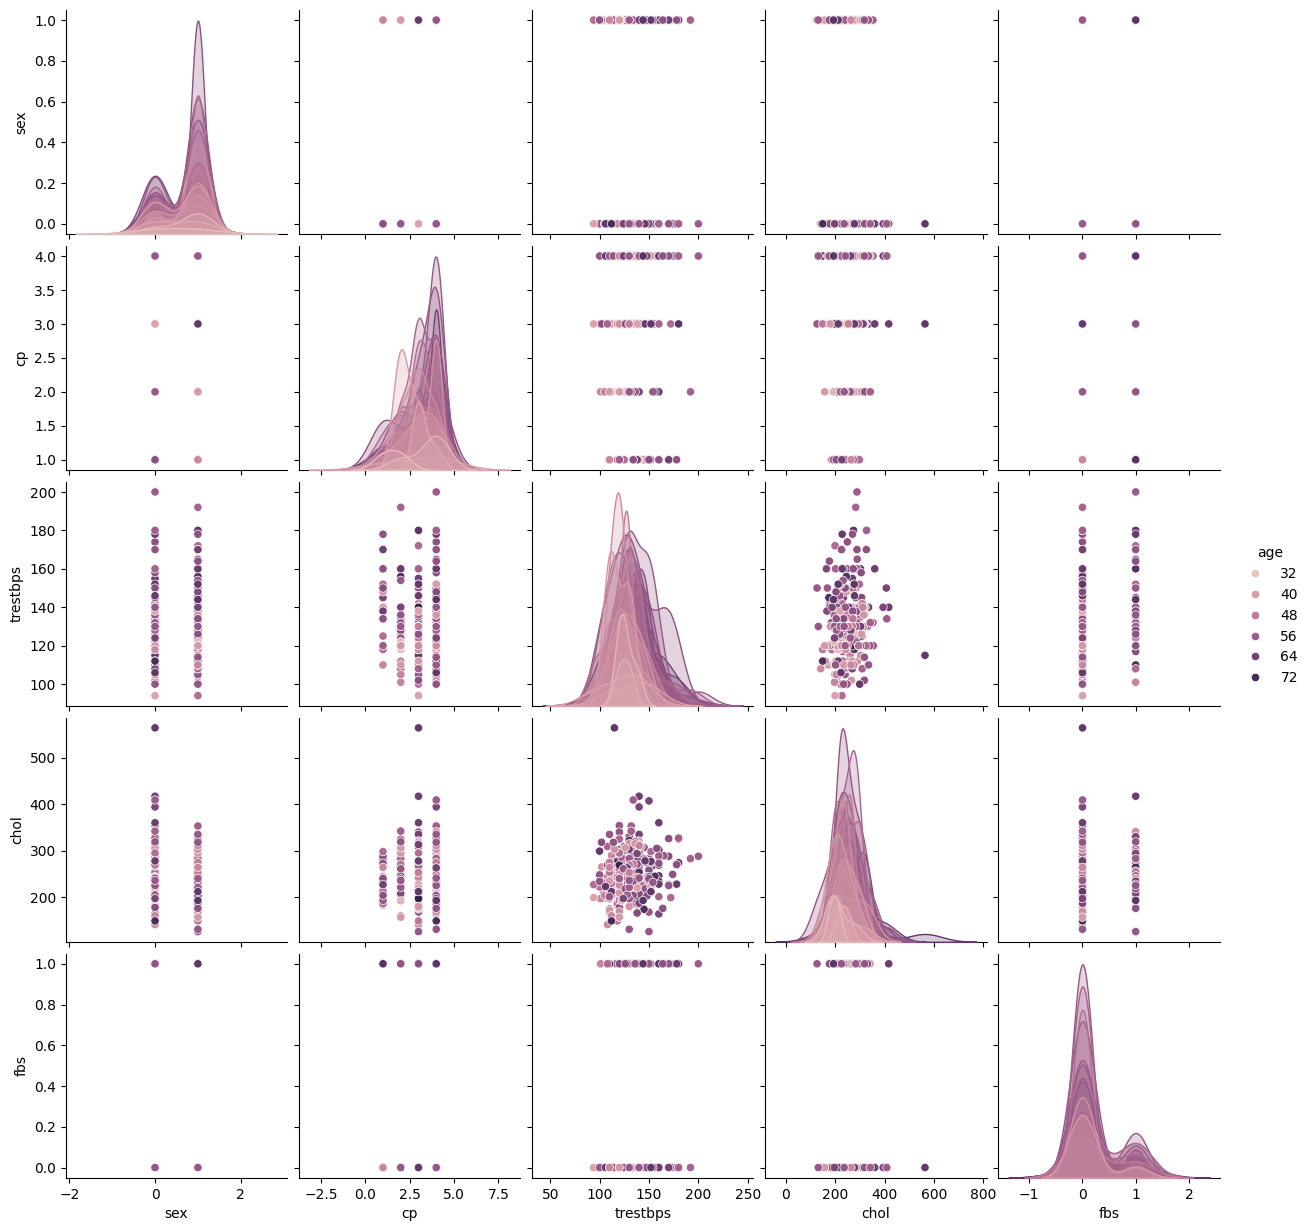

In [5]:
columns = ['age', 'sex', 'cp',	'trestbps',	'chol',	'fbs']
sns.pairplot(df[columns], hue='age', diag_kind='kde')
plt.show()

**TASK: Create a heatmap that displays the correlation between all the columns.**

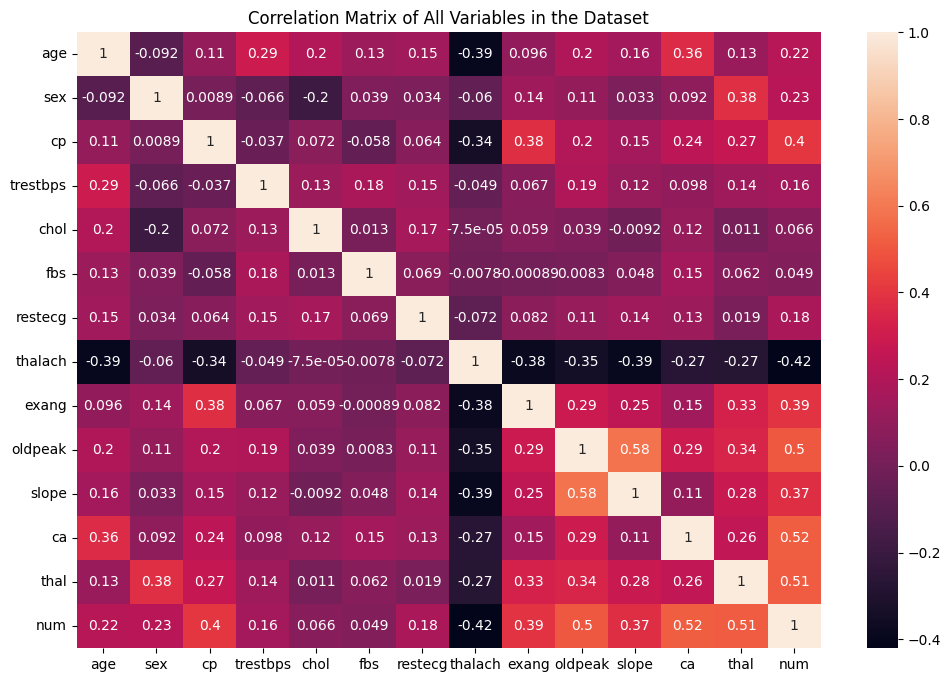

In [6]:
plt.figure(figsize=(12, 8))
plt.title("Correlation Matrix of All Variables in the Dataset")
sns.heatmap(df.corr(), annot=True)
plt.show()

# Modeling Task

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [10]:
X = df.drop(columns=["num"])
y = df["num"]

**TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.**

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegressionCV

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_test = scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)


## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

logistic = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [26]:
print("Best C value:", grid_search.best_params_['C'])
print("Training accuracy:", grid_search.best_score_)
print("Test accuracy:", grid_search.score(X_test_scaled, y_test))

Best C value: 0.1
Training accuracy: 0.5958020050125314
Test accuracy: 0.6


### Coeffecients

**TASK: Report back the model's coefficients.**

In [27]:
# Accessing the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Creating a DataFrame to display the coefficients along with their corresponding feature names
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Displaying the coefficients
print(coef_df)

     Feature  Coefficient
0        age    -0.060556
1        sex    -0.423086
2         cp    -0.642380
3   trestbps    -0.367553
4       chol    -0.138936
5        fbs     0.203743
6    restecg    -0.268631
7    thalach     0.437380
8      exang    -0.241733
9    oldpeak    -0.318429
10     slope    -0.307704
11        ca    -0.885214
12      thal    -0.604259


**Task: Create a visualization of the coefficients.**

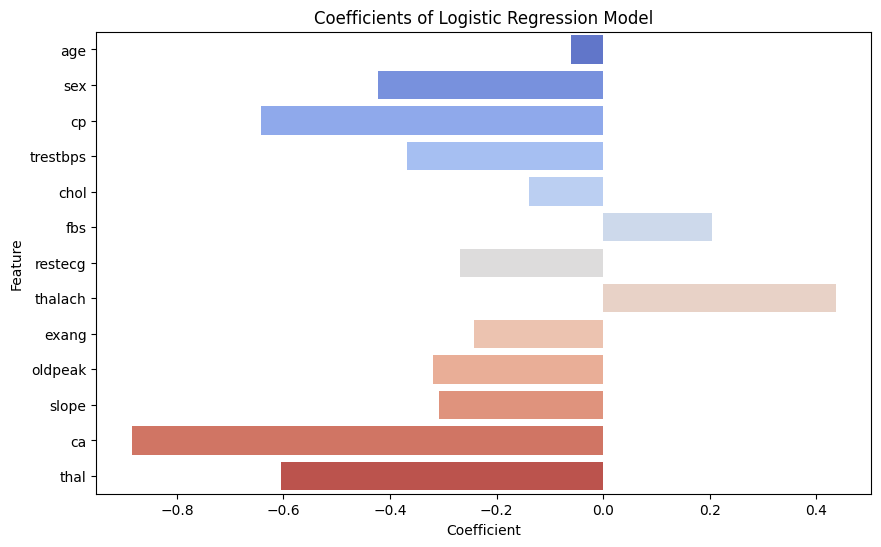

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, hue='Feature', dodge=False, palette='coolwarm', legend=False)
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

---------

## Model Performance Evaluation

**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

Test accuracy: 0.6
Confusion Matrix Array:
[[7 1 0 0 0]
 [2 2 0 0 0]
 [0 0 0 1 1]
 [0 0 0 0 0]
 [1 0 0 0 0]]


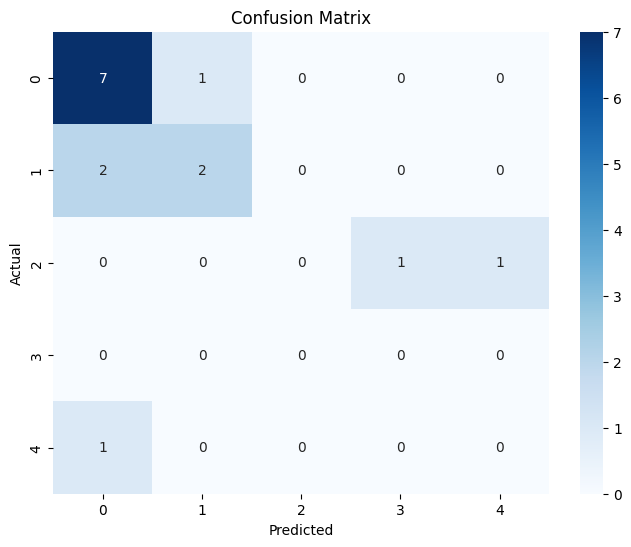


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.67      0.50      0.57         4
           2       1.00      0.00      0.00         2
           3       0.00      1.00      0.00         0
           4       0.00      0.00      1.00         1

    accuracy                           0.60        15
   macro avg       0.47      0.47      0.47        15
weighted avg       0.68      0.60      0.63        15



In [32]:
test_accuracy = model.score(X_test_scaled, y_test)
print("Test accuracy:", test_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Array:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=1)
print("\nClassification Report:")
print(class_report)

### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

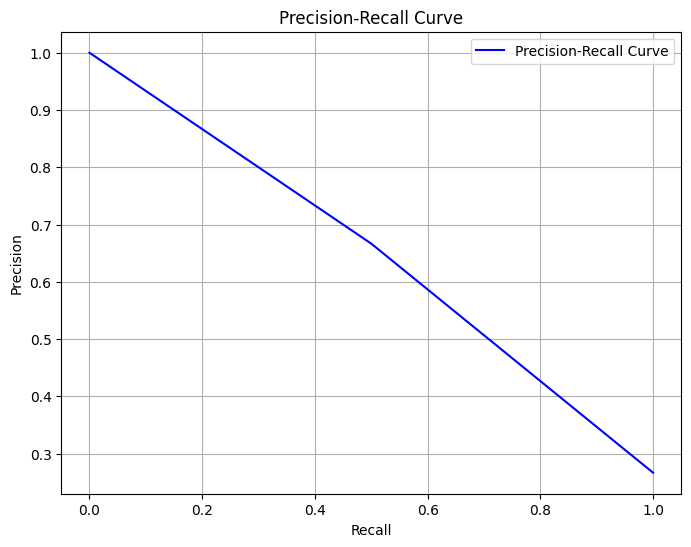

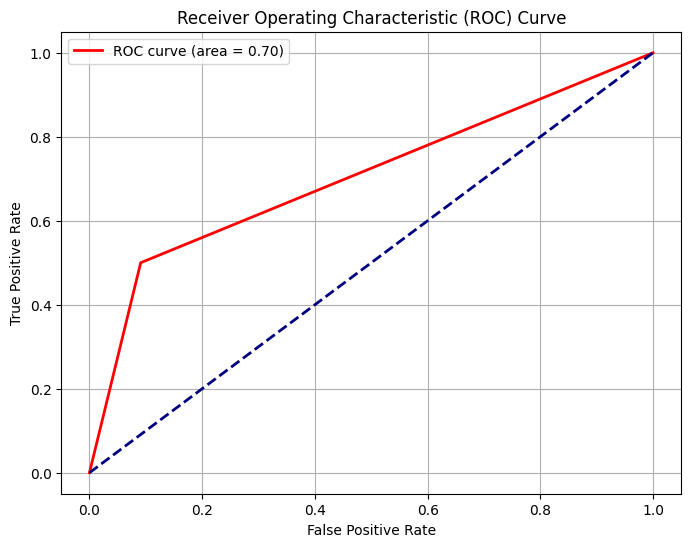

In [35]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Assuming your original target variable is y
# Select one class as the positive class
positive_class = 1  # For example, select class 1 as the positive class

# Create a binary target variable
binary_y_test = (y_test == positive_class).astype(int)
binary_y_pred = (y_pred == positive_class).astype(int)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(binary_y_test, binary_y_pred)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(binary_y_test, binary_y_pred)
roc_auc = auc(fpr, tpr)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()
